# 등굣길


**문제 설명**

계속되는 폭우로 일부 지역이 물에 잠겼습니다. 물에 잠기지 않은 지역을 통해 학교를 가려고 합니다. 집에서 학교까지 가는 길은 `m` x `n` 크기의 격자모양으로 나타낼 수 있습니다.

아래 그림은 `m` = 4, `n` = 3 인 경우입니다.

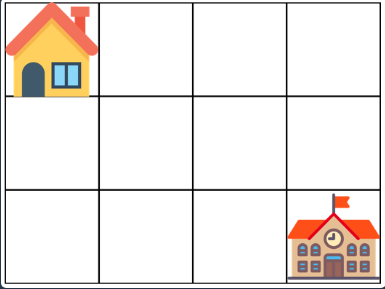

가장 왼쪽 위, 즉 집이 있는 곳의 좌표는 (1, 1)로 나타내고 가장 오른쪽 아래, 즉 학교가 있는 곳의 좌표는 (m, n)으로 나타냅니다.

격자의 크기 m, n과 물이 잠긴 지역의 좌표를 담은 2차원 배열 `puddles`이 매개변수로 주어집니다. 집에서 학교까지 갈 수 있는 최단경로의 개수를 **1,000,000,007**로 나눈 나머지를 return 하도록 solution 함수를 작성해주세요.

**제한사항**

- 격자의 크기 m, n은 1 이상 100 이하인 자연수입니다.
- m과 n이 모두 1인 경우는 입력으로 주어지지 않습니다.
- 물에 잠긴 지역은 0개 이상 10개 이하입니다.
- 집과 학교가 물에 잠긴 경우는 입력으로 주어지지 않습니다.

**입출력 예**

|m|	n|	puddles|	return|
|:-:|:-:|:-:|:-:|
|4|	3|	[[2, 2]]|	4|

**입출력 예 설명**

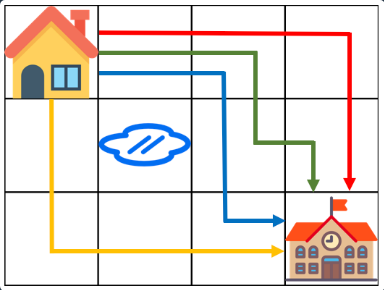

**파이썬 2차원 배열에서 `*` 연산자를 활용해서 대입하면 문제가 발생한다.**
- `*`  연산자로 초기화를 할 때 값을 각각 할당하는 게 아니고, 하나의 객체를 생성해 놓곤 모두가 이를 가리키는 `얕은 복사`를 진행한다는 데서 발생한다.


- 즉, 다음과 같은 문제가 발생한다.
    ```
    routes = [[0] * 4] * 3 #
    print(routes)
    print(id(routes[0]), id(routes[1]), id(routes[2]))

    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    2181626611584 2181626611584 2181626611584

    ```
    
- 얕은 복사를 피하려면 `for`문을 활용하는 게 좋다. 다음과 같이 2차원 배열을 만들어보자.

    ```
    routes = [ [0] * 4 for _ in range(3)]
    print(routes)
    print(id(routes[0]), id(routes[1]), id(routes[2]))

    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    2181627505920 2181626544640 2181626633472
        
    ```

In [19]:
routes = [ [0] * 4 for _ in range(3)]

for puddle in puddles:
    x, y = puddle[0] - 1, puddle[1] - 1
    routes[x][y] = 'x'
    
print(routes)

[[0, 0, 0, 0], [0, False, 0, 0], [0, 0, 0, 0]]


In [49]:
from collections import deque

def solution(m, n, puddles):
    
    routes = [[0] * m for _ in range(n)]

    for puddle in puddles:
        x, y = puddle[0] - 1, puddle[1] - 1
        routes[x][y] = 'x'
    
    # 오른쪽, 아래로 이동
    dx = [0, 1]
    dy = [1, 0]
    
    queue = deque()
    queue.append((0, 0))
    
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 4가지 방향으로 위치 확인
        for i in range(2):
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 원점을 다시 가는경우 무시 
            if nx == 0 and ny == 0:
                continue
                
            # 지도를 벗어나는 경우 무시
            if nx < 0 or nx >= n or ny < 0 or ny >= n:
                continue
            
            # 장애물이 있는 경우 무시
            if routes[nx][ny] == 'x':
                continue

            routes[nx][ny] += routes[x][y] 

            ## 아직 방문하지 않은 노드
            if (nx, ny) not in  queue:
                queue.append((nx, ny))
    
    return routes, routes[n-1][m-1]

In [50]:
m, n = 4, 3
puddles = [[2,2]]
solution(m, n, puddles)

([[0, 0, 0, 0], [0, 'x', 0, 0], [0, 0, 0, 0]], 0)

[[2, 1, 2, 0], 
[1, 'x', 3, 0], 
[2, 3, 4, 0]]